[[193 208 221 ...  11   7  19]
 [182 222 241 ...   8  12  20]
 [201 204 194 ...   9  19  19]
 ...
 [167 174 178 ...  47  48  48]
 [147 155 158 ...  48  48  47]
 [138 137 139 ...  48  47  45]]


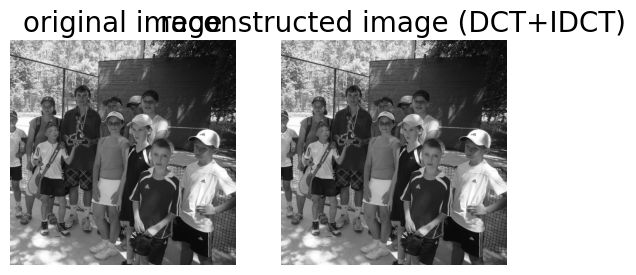

In [1]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read lena RGB image and convert to grayscale
im = rgb2gray(imread('data_basic2/source.png')) 
print((im * 256).astype(np.uint8))
imF = dct2(im)

im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()

In [22]:
for query_num in range(8):
    im = rgb2gray(imread(f'data_basic2/query{query_num}.png'))
    # im = (rgb2gray(imread(f'data_basic2/query{i}.png')) * 256).astype(np.uint8)
    imF = dct2(im)

    # binarize the DCT result by average value
    binarized_imF = (imF > np.mean(imF)).astype(np.uint8)[:6, :6]

    with open(f"./data_basic2/query{query_num}_dst.data", "wb") as fp:
        binarized_imF.tofile(fp)
        np.savetxt(f"./data_basic2/query{query_num}_dst.txt", binarized_imF, fmt="%d")
    if query_num == 0:
        print(binarized_imF)


[[1 1 0 1 1 1]
 [1 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 0 1 1]
 [1 0 0 0 1 0]
 [1 0 0 0 0 1]]


In [17]:
import os

NEEDED_FREQ_MATRIX_SIZE = 6

im = rgb2gray(imread(f'data_basic2/source.png'))
# im = (rgb2gray(imread(f'data_basic2/query{i}.png')) * 256).astype(np.uint8)
# imF = dct2(im)

def calc_imf(im, fp):
    dump_data = np.array((1, 0), dtype=np.uint8)
    for i in range(0, 512 - 64 + 1):
        for j in range(0, 512 - 64 + 1):
            imF = dct2(im[i:i+64, j:j+64])
            # binarize the DCT result by average value
            binarized_imF = (imF > np.mean(imF)).astype(np.uint8)
            needed_data = binarized_imF[:NEEDED_FREQ_MATRIX_SIZE, :NEEDED_FREQ_MATRIX_SIZE]
            needed_data.tofile(fp)

            if i == 0 and j == 0:
                print(binarized_imF)


with open(f"./data_basic2/source_dst.data", "wb") as fp:
    calc_imf(im, fp)



[[1 0 1 ... 1 1 0]
 [1 1 0 ... 1 1 1]
 [0 1 1 ... 0 1 1]
 ...
 [0 0 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 [1 1 1 ... 0 1 0]]


In [20]:
import os

NEEDED_FREQ_MATRIX_SIZE = 6

im = rgb2gray(imread(f'data_basic2/source.png'))
# im = (rgb2gray(imread(f'data_basic2/query{i}.png')) * 256).astype(np.uint8)
# imF = dct2(im)

def calc_imf(im, fp):
    dump_data = np.array((1, 0), dtype=np.uint8)
    for i in range(0, 512 - 64 + 1):
        for j in range(0, 512 - 64 + 1):
            imF = dct2(im[i:i+64, j:j+64])
            # binarize the DCT result by average value
            binarized_imF = (imF > np.mean(imF)).astype(np.uint8)
            needed_data = binarized_imF[:NEEDED_FREQ_MATRIX_SIZE, :NEEDED_FREQ_MATRIX_SIZE]
            np.savetxt(fp, needed_data, fmt='%d')

            if i == 0 and j == 0:
                print(needed_data)


with open(f"./data_basic2/source_dst.txt", "w", encoding='utf-8') as fp:
    calc_imf(im, fp)



[[1 0 1 ... 1 1 0]
 [1 1 0 ... 1 1 1]
 [0 1 1 ... 0 1 1]
 ...
 [0 0 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 [1 1 1 ... 0 1 0]]
